Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

1. Data Preparation:

    Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [2]:
df = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [3]:
print("Total Column",len(df))

Total Column 908


In [4]:
df.shape

(908, 13)

2. Exploratory Data Analysis (EDA):

    Perform exploratory data analysis to understand the structure of the dataset.

    Check for missing values, outliers, and inconsistencies in the data.

    Visualize the distribution of features, including histograms, box plots, and correlation matrices.

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [8]:
colname = []
for i in df.columns:
    if df[i].dtype == 'object':
        colname.append(i)
    elif df[i].dtype == 'bool':
            colname.append(i)
colname

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in colname:
    if df[i].dtype == 'bool':
        df[i] = df[i].astype(int)   # convert True/False → 1/0
    elif df[i].dtype == 'object':
        df[i] = le.fit_transform(df[i].astype(str))  # encode strings
    df[i] = le.fit_transform(df[i])
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print("feature",i)
    print("mapping", le_name_mapping)

feature sex
mapping {0: 0, 1: 1}
feature cp
mapping {0: 0, 1: 1, 2: 2, 3: 3}
feature fbs
mapping {0: 0, 1: 1}
feature restecg
mapping {0: 0, 1: 1, 2: 2}
feature exang
mapping {0: 0, 1: 1, 2: 2}
feature slope
mapping {0: 0, 1: 1, 2: 2}
feature thal
mapping {0: 0, 1: 1, 2: 2}


In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,1,2.3,0,0,0
1,41,1,1,135,203,0,1,132,1,0.0,1,0,0
2,57,1,0,140,192,0,1,148,1,0.4,1,0,0
3,52,1,3,118,186,0,0,190,1,0.0,1,0,0
4,57,1,0,110,201,0,1,126,2,1.5,1,0,0


Check for missing values, outliers, and inconsistencies in the data.

Visualize the distribution of features, including histograms, box plots, and correlation matrices.

Original shape: (846, 13)
After removing outliers: (229, 13)


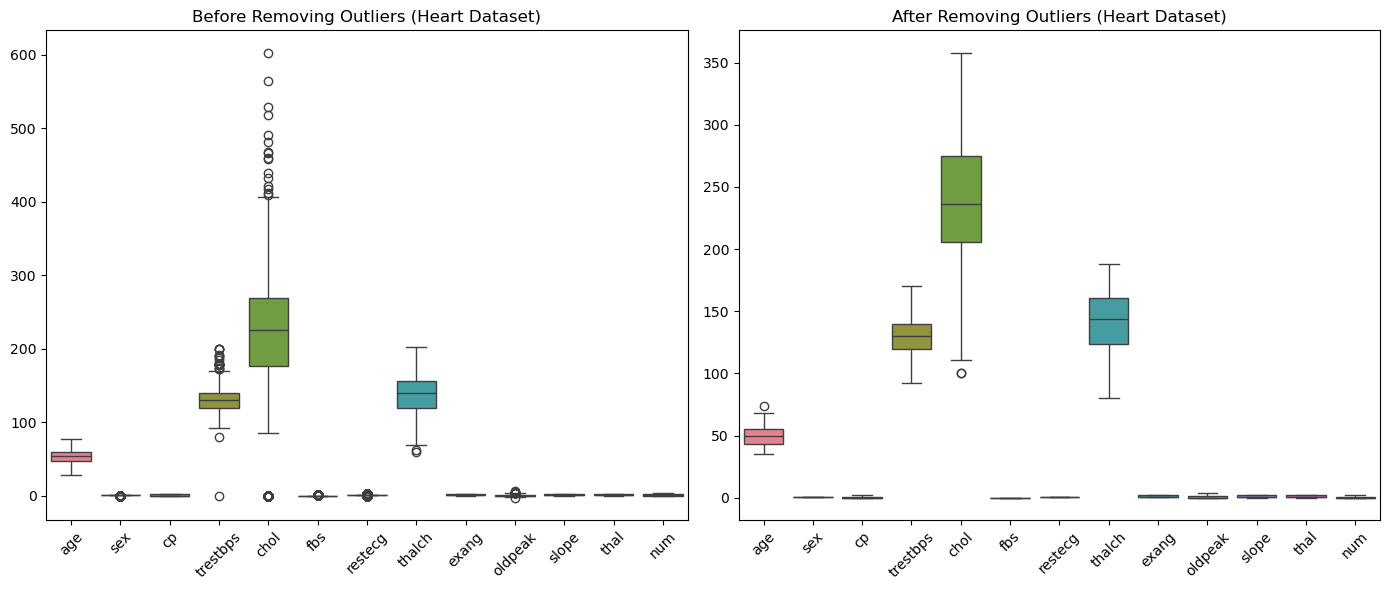

In [11]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=[float, int]).columns

# Compute Q1, Q3 and IQR
Q1 = df[numeric_cols].quantile(0.30)
Q3 = df[numeric_cols].quantile(0.70)
IQR = Q3 - Q1

# Remove outliers (any column outside 1.5*IQR)
df_no_outliers = df[~((df[numeric_cols] < (Q1 - 1.5*IQR)) | (df[numeric_cols] > (Q3 + 1.5*IQR))).any(axis=1)]

print("Original shape:", df.shape)
print("After removing outliers:", df_no_outliers.shape)

# Boxplot before and after
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(data=df[numeric_cols])
plt.title("Before Removing Outliers (Heart Dataset)")
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.boxplot(data=df_no_outliers[numeric_cols])
plt.title("After Removing Outliers (Heart Dataset)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

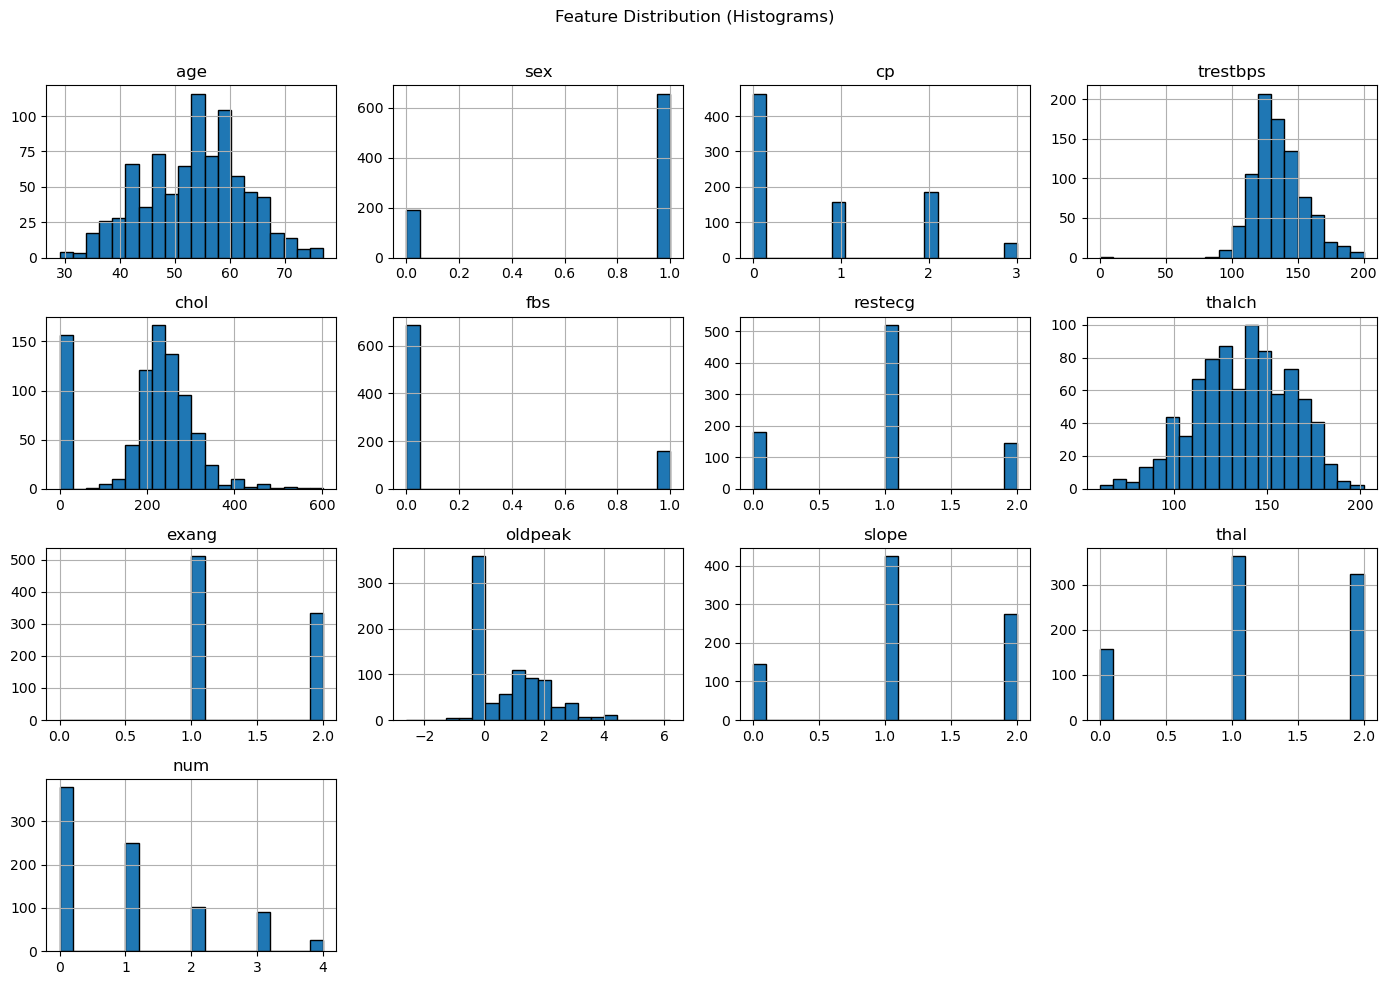

In [12]:
# 1️⃣ Histograms for each feature

df[numeric_cols].hist(figsize=(14,10), bins = 20, edgecolor="black")
plt.suptitle("Feature Distribution (Histograms)")
plt.tight_layout(rect=[0,0,1,0.97])
plt.show()

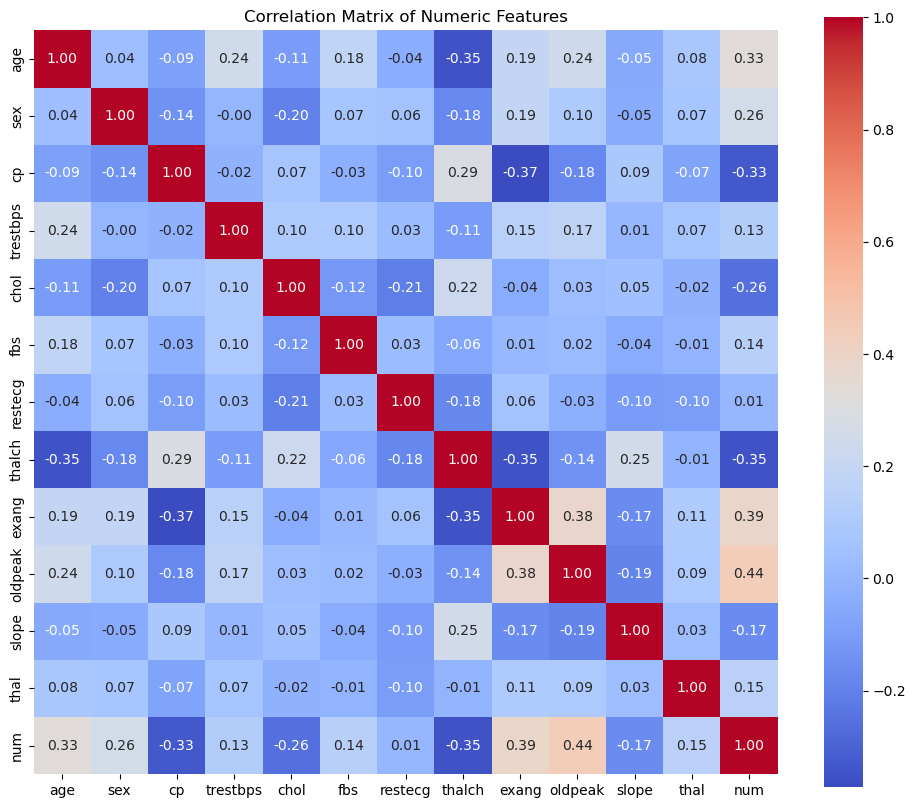

In [13]:
# 3️⃣ Correlation matrix

plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap = "coolwarm", square=True)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


4. Decision Tree Classification:

   Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [14]:
x = df.drop('num', axis=1)
y = df['num']

In [15]:
x.shape

(846, 12)

In [16]:
y.shape

(846,)

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=40)


In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 12)
(254, 12)
(592,)
(254,)


Implement a Decision Tree Classification model using a library like scikit-learn.

In [19]:
from sklearn.tree import DecisionTreeClassifier
treemodel = DecisionTreeClassifier()
treemodel.fit(x_train,y_train)


DecisionTreeClassifier()

In [20]:
y_pred = treemodel.predict(x_test)

print(y_pred)

[1 0 2 1 1 1 3 3 0 2 0 0 0 0 2 0 1 0 1 0 3 3 1 0 1 1 2 1 1 2 3 0 0 0 2 1 0
 0 1 3 1 1 1 1 1 2 1 0 3 3 0 2 1 3 2 3 0 1 2 1 0 0 0 0 0 1 0 0 0 0 0 2 0 1
 0 1 0 1 1 1 1 1 4 0 2 0 3 1 2 0 2 0 0 0 0 1 0 2 1 3 0 1 0 0 1 2 0 0 1 0 4
 0 2 1 0 0 3 0 4 0 0 4 0 0 0 0 0 1 1 2 1 1 0 0 2 2 2 1 0 0 0 0 1 0 1 0 1 2
 0 0 0 1 3 0 0 1 0 2 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 4 0 1 1 1 3 0 1 2 3 1 1
 0 0 0 1 0 1 0 0 0 4 0 2 3 0 1 0 1 0 0 0 0 0 2 0 3 4 0 1 1 0 2 1 0 0 1 3 1
 1 0 1 1 0 1 1 3 1 0 0 1 2 0 0 1 0 3 1 1 1 0 0 1 0 0 0 0 1 1 0 0]


Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, classification_report, roc_curve
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score is : ", acc)

precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Full report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# For multiclass, need probability predictions
y_pred_proba = treemodel.predict_proba(x_test)

roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr", average="weighted")
print("ROC-AUC:", roc_auc)



Accuracy Score is :  0.4645669291338583
Precision: 0.4511388215875876
Recall: 0.4645669291338583
F1-score: 0.4574942453539754

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       113
           1       0.35      0.38      0.36        77
           2       0.21      0.22      0.22        27
           3       0.10      0.07      0.08        28
           4       0.00      0.00      0.00         9

    accuracy                           0.46       254
   macro avg       0.27      0.28      0.27       254
weighted avg       0.45      0.46      0.46       254

ROC-AUC: 0.6213897484028628


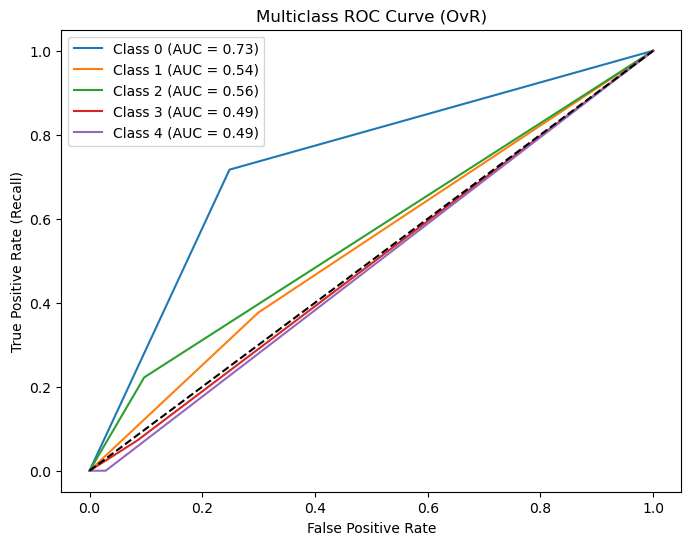

In [22]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the target (one-hot encoding for ROC curve)
classes = sorted(y.unique())
y_test_bin = label_binarize(y_test, classes=classes)
y_pred_proba = treemodel.predict_proba(x_test)

# Plot ROC for each class
plt.figure(figsize=(8,6))
for i, cls in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {cls} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Multiclass ROC Curve (OvR)")
plt.legend()
plt.show()

5. Hyperparameter Tuning:

    Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as maximum depth, minimum samples split, and criterion.

In [23]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10, 20],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(x_train,y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Cross-validation Accuracy:", grid_search.best_score_)

best_dt = grid_search.best_estimator_

✅ Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 2}
✅ Best Cross-validation Accuracy: 0.5490385984902435


6. Model Evaluation and Analysis:

    Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

    Visualize the decision tree structure to understand the rules learned by the model and identify important features

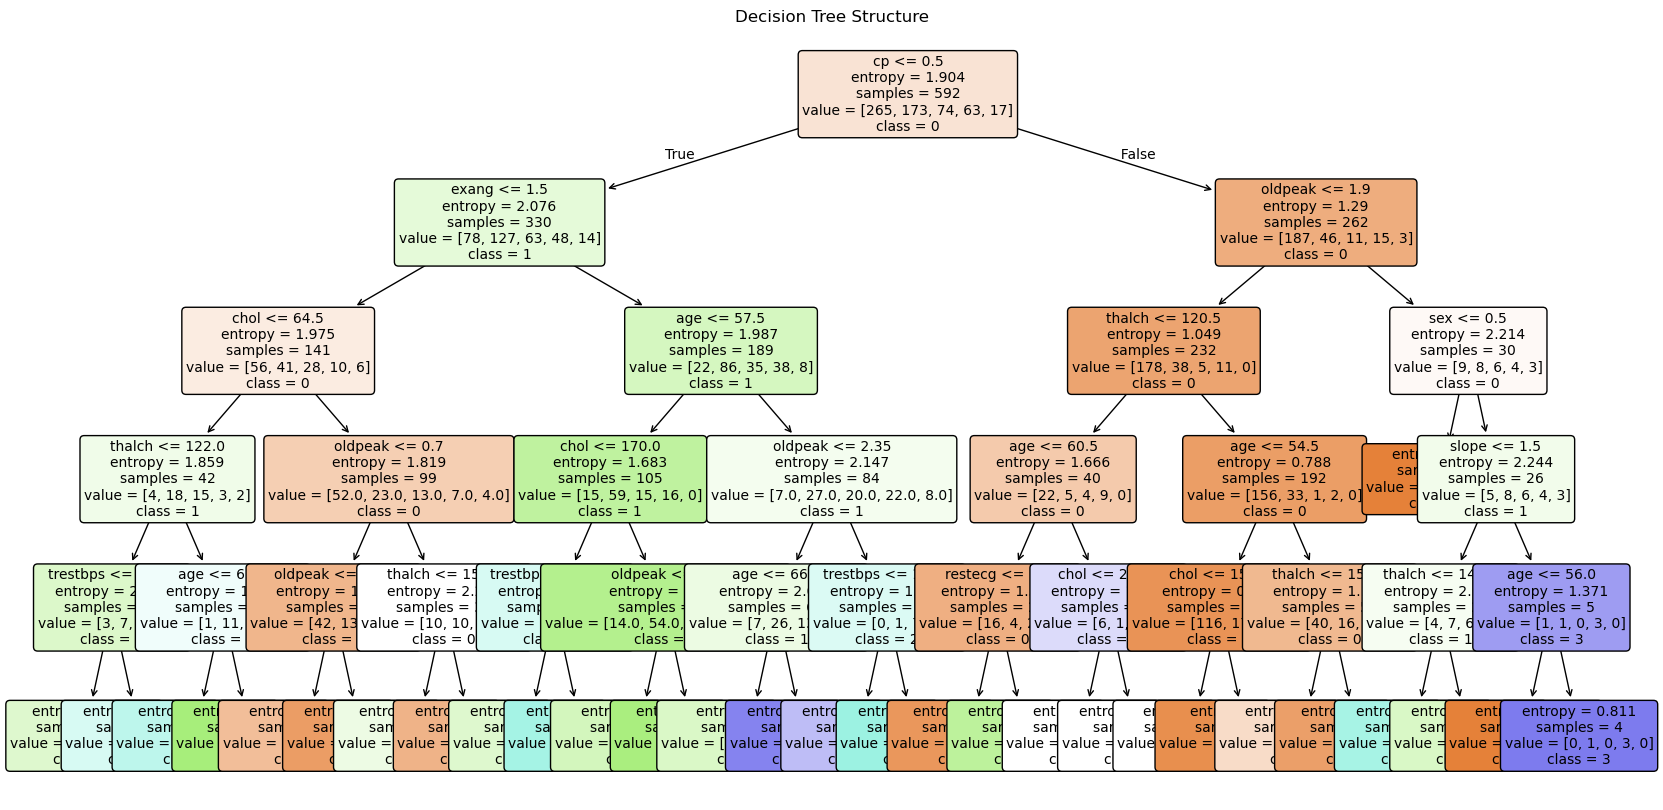

In [24]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_dt,
          feature_names=x.columns,
          class_names=[str(c) for c in y.unique()],
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Structure")
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_24276\1195412032.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices],y=x.columns[indices],palette="viridis")


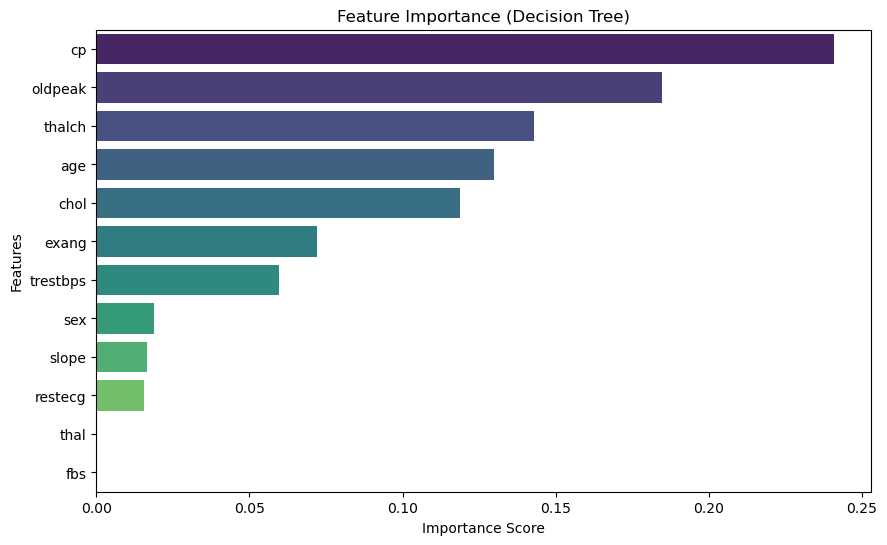

In [25]:
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices],y=x.columns[indices],palette="viridis")
plt.title("Feature Importance (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

Interview Questions:



1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

    Decision trees have several important hyperparameters that control their complexity and performance. The most common ones are:

    max_depth – limits how deep the tree can grow. A shallow tree may underfit, while a very deep tree can overfit the training data.

    min_samples_split – the minimum number of samples required to split a node. Higher values make the tree more general and reduce overfitting.

    min_samples_leaf – minimum samples required at a leaf node. Increasing this helps prevent leaves with very few samples, improving generalization.

    max_features – number of features considered for splitting at each node; lower values introduce randomness and may reduce overfitting.

    criterion – the metric used to decide splits, such as gini or entropy.

    By tuning these hyperparameters carefully, we can balance bias and variance to improve the model’s accuracy and generalization.

2. What is the difference between the Label encoding and One-hot encoding?
    
    Answer :- 

    Label Encoding converts categorical values into numeric labels. For example, 'Red', 'Green', 'Blue' might be encoded as 0, 1, 2. This is suitable for ordinal categories where there is a natural order.

    One-Hot Encoding, on the other hand, creates a separate binary column for each category. Using the same example, we would have three columns representing Red, Green, and Blue, with 1 indicating the presence of that category. This is preferred for nominal categories without order because it avoids introducing any false ordinal relationship.

    In practice, One-Hot Encoding is safer for most algorithms, while Label Encoding is mainly for ordinal features.
